### Binary Classifier
Predict the sentiment of IMDB reviews (negative or positive)

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import imdb

### Get datasets

In [2]:
LIMIT_WORD = 10000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=LIMIT_WORD)


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If y

### Data exploring (convert sequences to original review)

In [3]:
def convert_to_english(sequence):
    word_index = imdb.get_word_index()
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, '?') for i in sequence]
    )
    
    return decoded_review

In [4]:
print(convert_to_english(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Prepare the data (convert sequences into tensors)

In [5]:
def vectorize_sequences(sequences, dimension=LIMIT_WORD):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

#### Vectorize examples

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### Vectorize labels

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
y_train[0]

1.0

### Building the network
#### Architecture
2 intermediate Dense layers with 16 hidden unites per each (relu actovation function)
1 output layer (with sigmoid activation function)

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Compile
Loss function: binary crossentropy Optimizer: rmsprop

In [11]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

#### Training

1. Define validation data
2. Define epochs and batch size
3. Fit the model

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5097 - binary_accuracy: 0.7967 - val_loss: 0.4296 - val_binary_accuracy: 0.8249
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3154 - binary_accuracy: 0.9025 - val_loss: 0.3131 - val_binary_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2376 - binary_accuracy: 0.9234 - val_loss: 0.2845 - val_binary_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1894 - binary_accuracy: 0.9400 - val_loss: 0.2742 - val_binary_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1535 - binary_accuracy: 0.9535 - val_loss: 0.2980 - val_binary_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1277 - binary_accuracy: 0.9618 - val_loss: 0.2915 - val_binary_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - los

### Plot results
Training and validation loss

<function matplotlib.pyplot.show(close=None, block=None)>

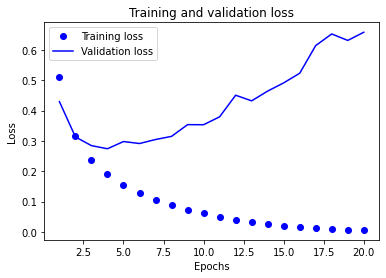

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [15]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

#### Training and validation accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

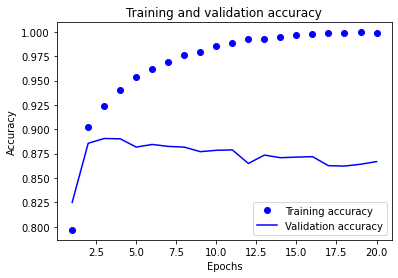

In [16]:
plt.clf()

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)
model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512
)
results = model.evaluate(x_test, y_test)

C:\Users\Aishwarya\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4977 - binary_accuracy: 0.7921
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2769 - binary_accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2044 - binary_accuracy: 0.9298
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2978 - binary_accuracy: 0.8834


In [18]:
print(results)

[0.29775604605674744, 0.8834400177001953]


In [19]:
model.predict(x_test)

array([[0.23564404],
       [0.99998355],
       [0.9471749 ],
       ...,
       [0.1678251 ],
       [0.08921432],
       [0.6339953 ]], dtype=float32)